# 01) Importar librerias correspondientes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
pwd

'C:\\Users\\60069615\\Desktop\\Python\\clase_04-master'

# 02) Importar dataset de properati

In [3]:
dt = pd.read_csv(r'C:\\Users\\60069615\\Desktop\\Python\\clase_04-master\clusterai_2019_clase04_regresion_dataset_properati_caba.csv', delimiter=',')

In [4]:
dt.head()

,id,created_on,operation,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,1649a3c35359d681abae4a63d9a8545054d2096b,2017-09-22,sell,house,Palermo Viejo,-34.588953,-58.429882,2000000.0,312.0,NaN,NaN,NaN,NaN
1,1ab035ccbe77702987c3f09850d12c634e612aa2,2017-09-01,sell,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,NaN,3.0,NaN
2,90fc7c61b6fbc6ef99368a21cd9ac0d30d54c697,2017-09-01,sell,apartment,Barracas,-34.644924,-58.371919,140000.0,125.0,85.0,NaN,NaN,NaN
3,c195e8f3a596ab49b95d699c07e1a04be503ba68,2017-09-01,sell,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,2.0,3350.0
4,f891875ff44e6f99e30e101b3901d1e7510ef41b,2017-09-01,sell,apartment,Parque Patricios,-34.639173,-58.417069,94000.0,38.0,38.0,NaN,NaN,NaN


In [5]:
np.shape(dt)

(25319, 13)

In [6]:
dt.columns

Index(['id', 'created_on', 'operation', 'property_type', 'neighbourhood',
       'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2',
       'floor', 'rooms', 'expenses'],
      dtype='object')

# 03) Revisar con que columnas trabajar para luego quitarle los NaNs (queremos predecir precio)

In [7]:
dt.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
neighbourhood                0
lat                       1048
lon                       1048
price                     1928
surface_total_in_m2       3323
surface_covered_in_m2     2529
floor                    22093
rooms                     6607
expenses                 20289
dtype: int64

In [8]:
dt = dt.drop(['id','created_on'], axis=1)

In [9]:
dt_clean = dt.dropna(subset = ["price","surface_total_in_m2","surface_covered_in_m2","rooms","lat","lon"])
np.shape(dt_clean)

(15695, 11)

In [10]:
dt_clean.isnull().sum()

operation                    0
property_type                0
neighbourhood                0
lat                          0
lon                          0
price                        0
surface_total_in_m2          0
surface_covered_in_m2        0
floor                    13548
rooms                        0
expenses                 12600
dtype: int64

In [11]:
dt_clean = dt_clean.drop(['operation','floor','expenses'], axis=1)
dt_clean_an = dt_clean.drop(['lat','lon'],axis=1)
np.shape(dt_clean_an)

(15695, 6)

In [12]:
dt_clean_an.head()

,property_type,neighbourhood,price,surface_total_in_m2,surface_covered_in_m2,rooms
1,PH,Parque Chacabuco,131500.0,80.0,50.0,3.0
3,apartment,Recoleta,109000.0,45.0,45.0,2.0
5,apartment,Flores,160000.0,76.0,76.0,3.0
6,apartment,Caballito,160000.0,76.0,76.0,3.0
7,apartment,Villa Crespo,240435.0,101.0,75.0,3.0


# 04) Quitar Outliers de las variables que consideren utilizando cuantiles

In [13]:
np.max(dt_clean_an)

property_type                       store
neighbourhood            Villa del Parque
price                         1.72514e+07
surface_total_in_m2                184000
surface_covered_in_m2              150000
rooms                                  34
dtype: object

In [14]:
price_q97 = dt_clean_an.price.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(price_q97))

el cuantil 0.97 de la feature 'price' es = 2100047.45


In [15]:
surfacetotal_q97 = dt_clean_an.surface_total_in_m2.quantile(0.975)
print("el cuantil 0.97 de la feature 'surface_total_in_m2' es = " + str(surfacetotal_q97))

el cuantil 0.97 de la feature 'surface_total_in_m2' es = 380.0


In [16]:
surfacecovered_q97 = dt_clean_an.surface_covered_in_m2.quantile(0.975)
print("el cuantil 0.97 de la feature 'surface_covered_in_m2' es = " + str(surfacecovered_q97))

el cuantil 0.97 de la feature 'surface_covered_in_m2' es = 320.0


In [17]:
rooms_q97 = dt_clean_an.rooms.quantile(0.975)
print("el cuantil 0.97 de la feature 'rooms' es = " + str(rooms_q97))

el cuantil 0.97 de la feature 'rooms' es = 7.0


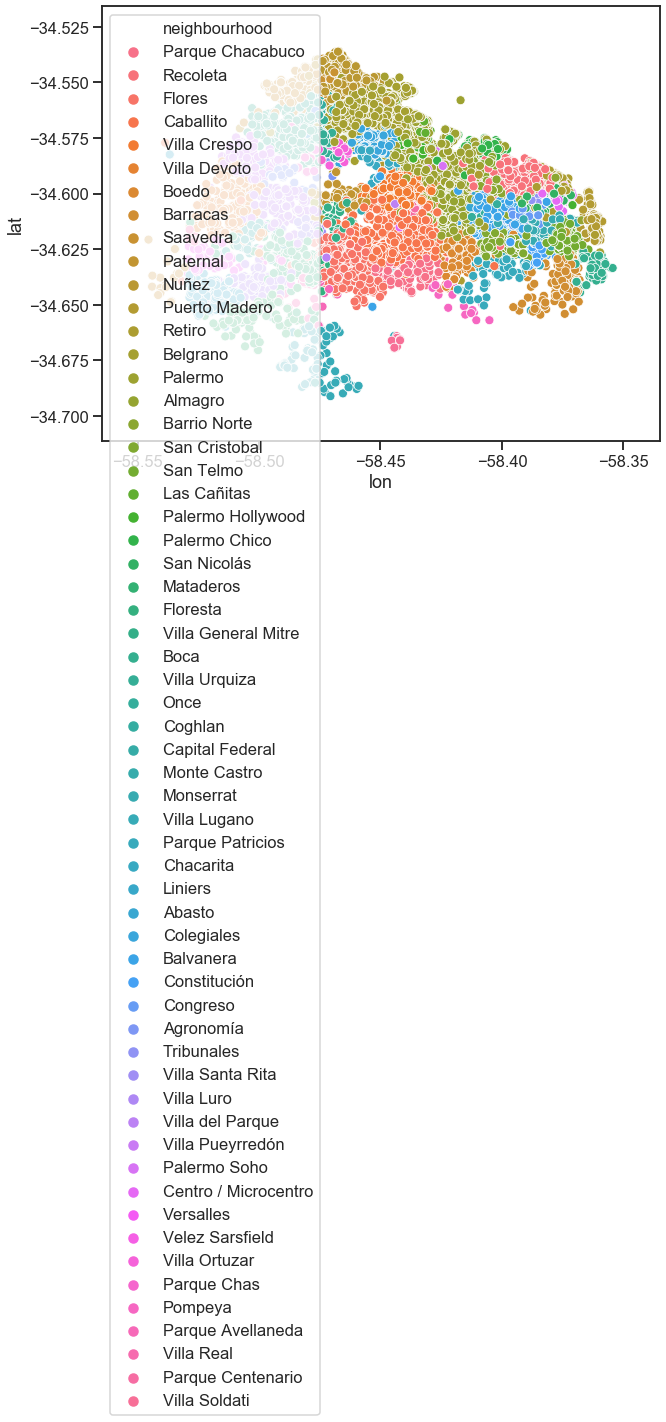

In [138]:
dt_clean_map = dt_clean.loc[(dt_clean.lat > -36) & (dt_clean.lat < -34) & (dt_clean.lon > -60) & (dt_clean.lon < -58)]
plt.figure(figsize=(10,8))
sns.scatterplot(dt_clean_map.lon,dt_clean_map.lat,hue=dt_clean_map.neighbourhood)
plt.show()

In [123]:
dt_clean_map.price.describe(percentiles=[.15,.30,.65,.90])

count    1.568500e+04
mean     3.801742e+05
std      6.283833e+05
min      1.140000e+04
15%      1.048188e+05
30%      1.350000e+05
50%      1.920000e+05
65%      2.600000e+05
90%      7.700000e+05
max      1.725144e+07
Name: price, dtype: float64

In [143]:
dt_clean_map.loc[(dt_clean_map['price'] > 0) & (dt_clean_map['price'] <= 100000), 'PriceBand'] = 1
dt_clean_map.loc[(dt_clean_map['price'] > 100000) & (dt_clean_map['price'] <= 135000), 'PriceBand']   = 2
dt_clean_map.loc[(dt_clean_map['price'] > 135000) & (dt_clean_map['price'] <= 192000), 'PriceBand']   = 3
dt_clean_map.loc[(dt_clean_map['price'] > 192000) & (dt_clean_map['price'] <= 260000), 'PriceBand']   = 4
dt_clean_map.loc[(dt_clean_map['price'] > 260000) & (dt_clean_map['price'] <= 770000), 'PriceBand']   = 5
dt_clean_map.loc[(dt_clean_map['price'] > 770000), 'PriceBand']  = 6
dt_clean_map.head()

C:\Users\60069615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\60069615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,rooms,PriceBand
1,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,3.0,2.0
3,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,2.0
5,apartment,Flores,-34.639497,-58.531714,160000.0,76.0,76.0,3.0,3.0
6,apartment,Caballito,-34.628021,-58.460598,160000.0,76.0,76.0,3.0,3.0
7,apartment,Villa Crespo,-34.592540,-58.434245,240435.0,101.0,75.0,3.0,4.0


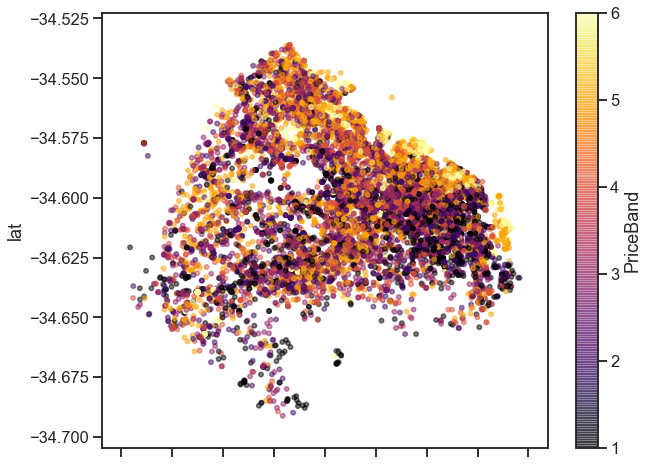

In [152]:
dt_clean_map.plot(kind='scatter',x='lon',y='lat',c='PriceBand',
       cmap=plt.get_cmap("inferno"), colorbar=True, alpha=0.5, figsize=(10,8))
plt.show()

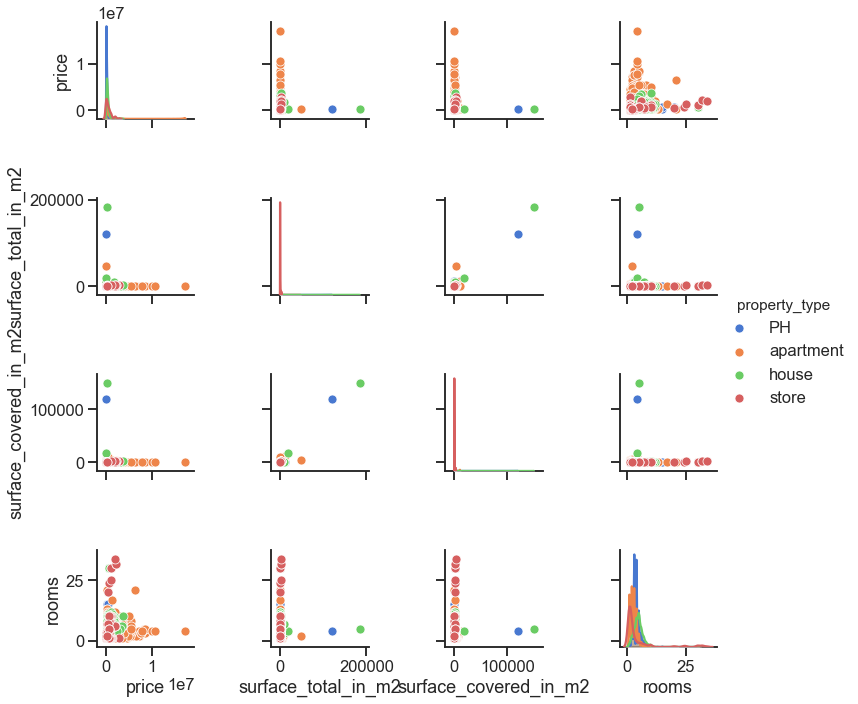

In [20]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(data = dt_clean_an, hue='property_type', palette="muted")
plt.show()

# 05) Realizar feature engineering si fuera necesario

In [21]:
dt_clean_an_per = dt_clean_an.loc[(dt_clean_an.price < price_q97) & (dt_clean_an.rooms < rooms_q97) & (dt_clean_an.surface_total_in_m2 < surfacetotal_q97) & (dt_clean_an.surface_covered_in_m2 < surfacecovered_q97)]
np.shape(dt_clean_an_per)

(14674, 6)

In [22]:
dt_clean_an_per.head()

,property_type,neighbourhood,price,surface_total_in_m2,surface_covered_in_m2,rooms
1,PH,Parque Chacabuco,131500.0,80.0,50.0,3.0
3,apartment,Recoleta,109000.0,45.0,45.0,2.0
5,apartment,Flores,160000.0,76.0,76.0,3.0
6,apartment,Caballito,160000.0,76.0,76.0,3.0
7,apartment,Villa Crespo,240435.0,101.0,75.0,3.0


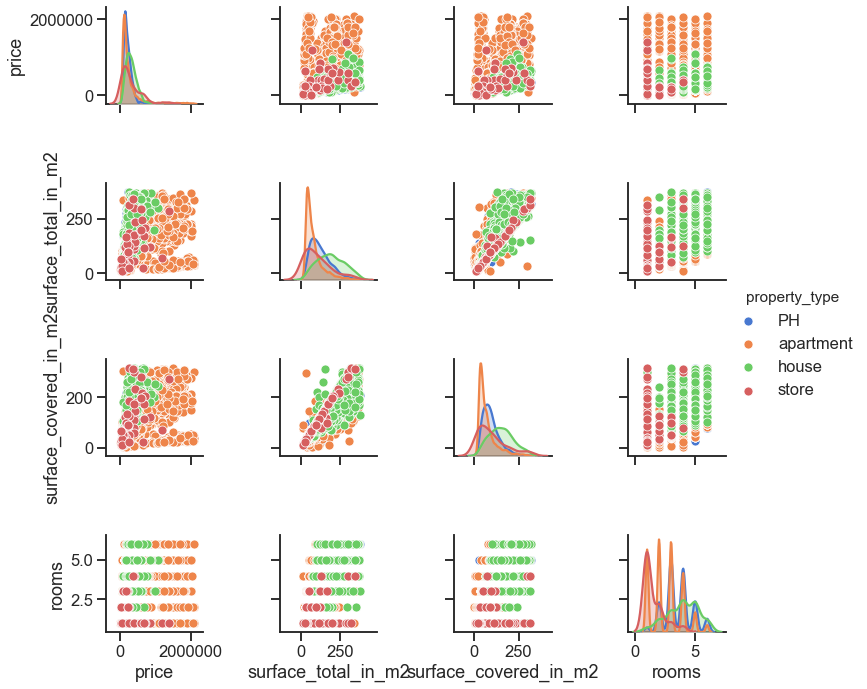

In [23]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(data = dt_clean_an_per, hue='property_type', palette= "muted")
plt.show()

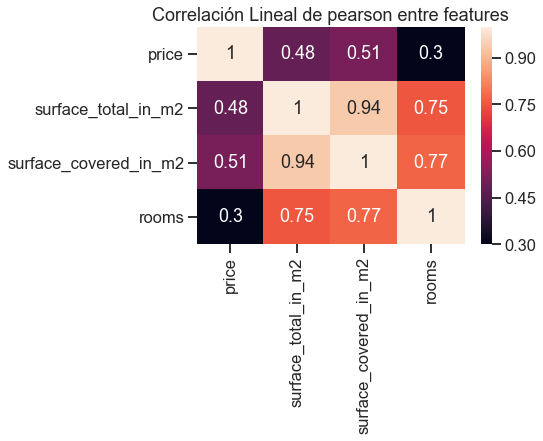

In [24]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(dt_clean_an_per.corr(), annot=True, fmt='.2g')
plt.title("Correlación Lineal de pearson entre features")
plt.show()

In [25]:
neighs_dummie = pd.get_dummies(dt_clean_an_per.neighbourhood)
property_dummie = pd.get_dummies(dt_clean_an_per.property_type)
dt_clean_an_per_dum = dt_clean_an_per.join([neighs_dummie, property_dummie])
np.shape(dt_clean_an_per_dum)

(14674, 69)

In [26]:
dt_clean_an_per_dum.head()

,property_type,neighbourhood,price,surface_total_in_m2,surface_covered_in_m2,rooms,Abasto,Agronomía,Almagro,Balvanera,...,Villa Pueyrredón,Villa Real,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store
1,PH,Parque Chacabuco,131500.0,80.0,50.0,3.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,apartment,Recoleta,109000.0,45.0,45.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,apartment,Flores,160000.0,76.0,76.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,apartment,Caballito,160000.0,76.0,76.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,apartment,Villa Crespo,240435.0,101.0,75.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
dt_premodel = dt_clean_an_per_dum.drop(['property_type','neighbourhood'],axis=1)
dt_premodel.head()

,price,surface_total_in_m2,surface_covered_in_m2,rooms,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,...,Villa Pueyrredón,Villa Real,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store
1,131500.0,80.0,50.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,109000.0,45.0,45.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,160000.0,76.0,76.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,160000.0,76.0,76.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,240435.0,101.0,75.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
np.shape(dt_premodel)

(14674, 67)

# 06) Separar Y (price) & X (decidir que features utilizar para trabajar)
Recuerden realizar auto scaling sobre las variables en cuestion

In [29]:
y = dt_premodel.iloc[:,0]
x = dt_premodel.iloc[:,1:67]
np.shape(x)

(14674, 66)

In [30]:
np.shape(y)

(14674,)

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=2)
np.shape(xtrain)

(11739, 66)

In [32]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

# 07) Implementar un modelo de regresion para predecir el precio. De ser posible comparar performance de distintos modelos.

# LINEAR REGRESSION

In [34]:
lr_model = LinearRegression()
lr_model.fit(xtrain_scal,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
ypred = lr_model.predict(xtest_scal)
np.shape(ypred)

(2935,)

In [36]:
RMSE_lr = np.sqrt(mean_squared_error(ytest, ypred))
print("Root Mean Squared Error is ",RMSE_lr)

Root Mean Squared Error is  256450.72206500085


In [37]:
MSE_lr = mean_squared_error(ytest, ypred)
print("Mean Squared Error is ",MSE_lr)

Mean Squared Error is  65766972847.66031


In [38]:
from sklearn.metrics import mean_absolute_error
MAE_lr = mean_absolute_error(ytest, ypred)
print("Mean Average Error is ",MAE_lr)

Mean Average Error is  117797.93305290994


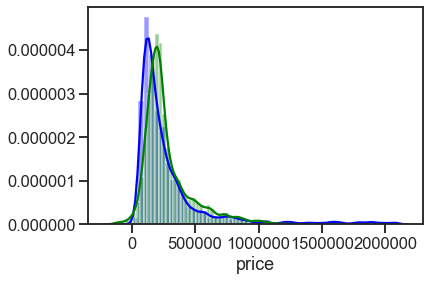

In [39]:
sns.distplot(ytest, color="b")
sns.distplot(ypred, color="g")
plt.show()

In [40]:
ypredtrain = lr_model.predict(xtrain_scal)
np.shape(ypredtrain)

(11739,)

In [41]:
RMSE_lrt = np.sqrt(mean_squared_error(ytrain, ypredtrain))
print("Root Mean Squared Error is ",RMSE_lrt)

Root Mean Squared Error is  232291.27710111748


In [42]:
MSE_lrt = mean_squared_error(ytrain, ypredtrain)
print("Mean Squared Error is ",MSE_lrt)

Mean Squared Error is  53959237417.26814


In [43]:
MAE_lrt = mean_absolute_error(ytrain, ypredtrain)
print("Mean Average Error is ",MAE_lrt)

Mean Average Error is  110126.01792754038


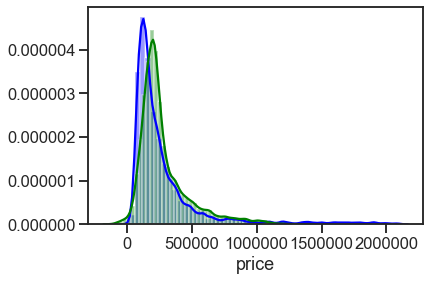

In [87]:
sns.distplot(ytrain, color="b")
sns.distplot(ypredtrain, color="g")
plt.show()

# KNN REGRESSION

In [44]:
neigh = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(24,41,2)
parameters_k

array([24, 26, 28, 30, 32, 34, 36, 38, 40])

In [45]:
parameters_knn = [{'n_neighbors': parameters_k}]
knn_model = GridSearchCV(neigh, parameters_knn, refit = True, cv=5, verbose=True)
knn_model.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([24, 26, 28, 30, 32, 34, 36, 38, 40])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [46]:
knn_model.best_params_

{'n_neighbors': 32}

In [47]:
knn_model.best_score_

0.6620861557971187

In [48]:
ypred2 = knn_model.predict(xtest_scal)
np.shape(ypred2)

(2935,)

In [49]:
RMSE_knn = np.sqrt(mean_squared_error(ytest, ypred2))
print("Root Mean Squared Error is ",RMSE_knn)

Root Mean Squared Error is  185538.77516778963


In [50]:
MSE_knn = mean_squared_error(ytest, ypred2)
print("Mean Squared Error is ",MSE_knn)

Mean Squared Error is  34424637090.76359


In [51]:
MAE_knn = mean_absolute_error(ytest, ypred2)
print("Mean Average Error is ",MAE_knn)

Mean Average Error is  70038.48467583158


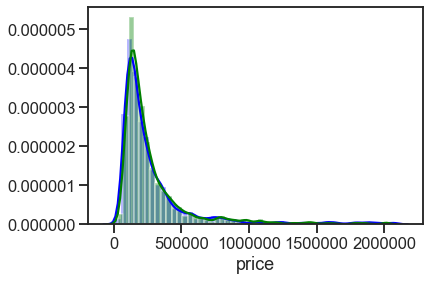

In [52]:
sns.distplot(ytest, color="b")
sns.distplot(ypred2, color="g")
plt.show()

In [53]:
ypredtrain2 = knn_model.predict(xtrain_scal)
np.shape(ypredtrain2)

(11739,)

In [54]:
RMSE_knnt = np.sqrt(mean_squared_error(ytrain, ypredtrain2))
print("Root Mean Squared Error is ",RMSE_knnt)

Root Mean Squared Error is  67077.73879225393


In [55]:
MSE_knnt = mean_squared_error(ytrain, ypredtrain2)
print("Mean Squared Error is ",MSE_knnt)

Mean Squared Error is  4499423041.481849


In [56]:
MAE_knnt = mean_absolute_error(ytrain, ypredtrain2)
print("Mean Average Error is ",MAE_knnt)

Mean Average Error is  10077.80461088315


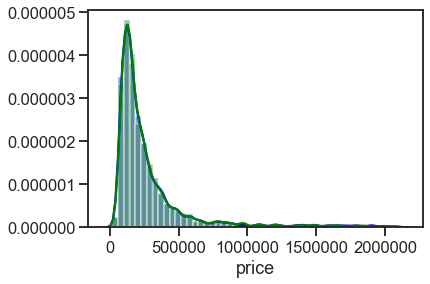

In [86]:
sns.distplot(ytrain, color="b")
sns.distplot(ypredtrain2, color="g")
plt.show()

# SUPPORT VECTOR REGRESSION

In [57]:
svreg = SVR()
parameters_svr_lin = [{'kernel':['linear'], 'C': [50,100,500,1000]}]
parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [500,1000,2000],'gamma': [0.001,0.01,0.1,1] }]
svr_model_lin = GridSearchCV(svreg, parameters_svr_lin, cv=5, verbose=True, refit = True)
svr_model_rbf = GridSearchCV(svreg, parameters_svr_rbf, cv=5, verbose=True, refit = True)

# LINEAR

In [58]:
svr_model_lin.fit(xtrain_scal,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [50, 100, 500, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [59]:
svr_model_lin.best_params_

{'C': 1000, 'kernel': 'linear'}

In [60]:
svr_model_lin.best_score_

0.3335298925310524

In [61]:
ypred3 = svr_model_lin.predict(xtest_scal)
np.shape(ypred3)

(2935,)

In [62]:
RMSE_svrlin = np.sqrt(mean_squared_error(ytest, ypred3))
print("Root Mean Squared Error is ",RMSE_svrlin)

Root Mean Squared Error is  270891.80561193684


In [63]:
MSE_svrlin = mean_squared_error(ytest, ypred3)
print("Mean Squared Error is ",MSE_svrlin)

Mean Squared Error is  73382370347.69537


In [64]:
MAE_svrlin = mean_absolute_error(ytest, ypred3)
print("Mean Average Error is ",MAE_svrlin)

Mean Average Error is  96183.12381153803


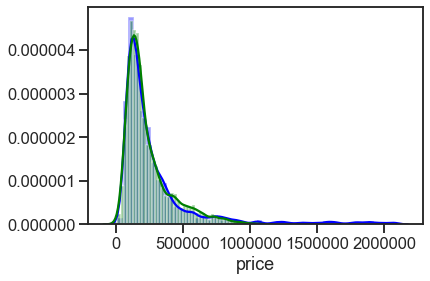

In [65]:
sns.distplot(ytest, color="b")
sns.distplot(ypred3, color="g")
plt.show()

In [66]:
ypredtrain3 = svr_model_lin.predict(xtrain_scal)
np.shape(ypredtrain3)

(11739,)

In [67]:
RMSE_svrlint = np.sqrt(mean_squared_error(ytrain, ypredtrain3))
print("Root Mean Squared Error is ",RMSE_svrlint)

Root Mean Squared Error is  246773.16306504374


In [68]:
MSE_svrlint = mean_squared_error(ytrain, ypredtrain3)
print("Mean Squared Error is ",MSE_svrlint)

Mean Squared Error is  60896994009.12667


In [69]:
MAE_svrlint = mean_absolute_error(ytrain, ypredtrain3)
print("Mean Average Error is ",MAE_svrlint)

Mean Average Error is  88574.09512855308


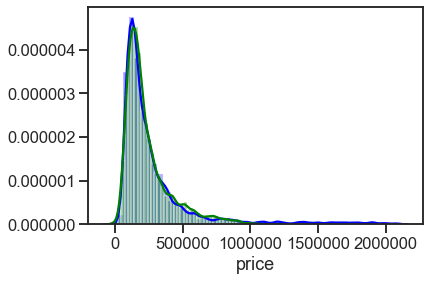

In [85]:
sns.distplot(ytrain, color="b")
sns.distplot(ypredtrain3, color="g")
plt.show()

# GAUSSIANO

In [71]:
svr_model_rbf.fit(xtrain_scal,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 11.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [500, 1000, 2000],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [72]:
svr_model_rbf.best_params_

{'C': 2000, 'gamma': 0.01, 'kernel': 'rbf'}

In [73]:
svr_model_rbf.best_score_

0.23366248727272007

In [74]:
ypred4 = svr_model_rbf.predict(xtest_scal)
np.shape(ypred4)

(2935,)

In [75]:
RMSE_svrrbf = np.sqrt(mean_squared_error(ytest,ypred4))
print("Root Mean Squared Error is ",RMSE_svrrbf)

Root Mean Squared Error is  282808.3854916634


In [76]:
MSE_svrrbf = mean_squared_error(ytest,ypred4)
print("Mean Squared Error is ",MSE_svrrbf)

Mean Squared Error is  79980582904.4013


In [77]:
MAE_svrrbf = mean_absolute_error(ytest,ypred4)
print("Mean Average Error is ",MAE_svrrbf)

Mean Average Error is  101809.46522835414


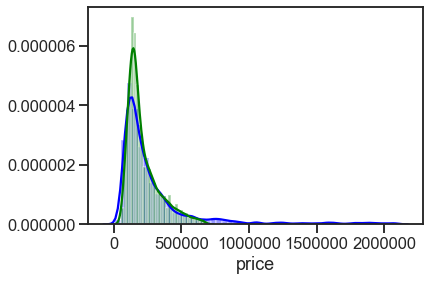

In [78]:
sns.distplot(ytest, color="b")
sns.distplot(ypred4, color="g")
plt.show()

In [79]:
ypredtrain4 = svr_model_rbf.predict(xtrain_scal)
np.shape(ypredtrain4)

(11739,)

In [80]:
RMSE_svrrbft = np.sqrt(mean_squared_error(ytrain,ypredtrain4))
print("Root Mean Squared Error is ",RMSE_svrrbft)

Root Mean Squared Error is  261601.05884006535


In [81]:
MSE_svrrbft = mean_squared_error(ytrain,ypredtrain4)
print("Mean Squared Error is ",MSE_svrrbft)

Mean Squared Error is  68435113986.24333


In [82]:
MAE_svrrbft = mean_absolute_error(ytrain,ypredtrain4)
print("Mean Average Error is ",MAE_svrrbft)

Mean Average Error is  95487.0961110843


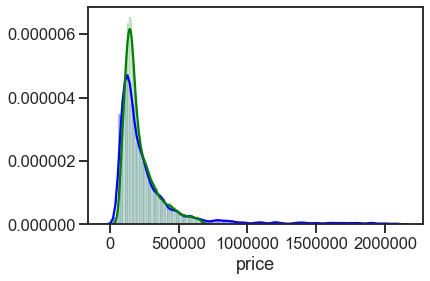

In [84]:
sns.distplot(ytrain, color="b")
sns.distplot(ypredtrain4, color="g")
plt.show()

# SUMMARY

# TEST

In [115]:
print("LINEAR REGRESSION:")
print("Root Mean Squared Error is ",RMSE_lr)
print("Mean Squared Error is ",MSE_lr)
print("Mean Average Error is ",MAE_lr)
print()
print("KNN REGRESSION:")
print("Root Mean Squared Error is ",RMSE_knn)
print("Mean Squared Error is ",MSE_knn)
print("Mean Average Error is ",MAE_knn)
print()
print("SVR LINEAR:")
print("Root Mean Squared Error is ",RMSE_svrlin)
print("Mean Squared Error is ",MSE_svrlin)
print("Mean Average Error is ",MAE_svrlin)
print()
print("SVR RBF:")
print("Root Mean Squared Error is ",RMSE_svrrbf)
print("Mean Squared Error is ",MSE_svrrbf)
print("Mean Average Error is ",MAE_svrrbf)

LINEAR REGRESSION:
Root Mean Squared Error is  256450.72206500085
Mean Squared Error is  65766972847.66031
Mean Average Error is  117797.93305290994

KNN REGRESSION:
Root Mean Squared Error is  185538.77516778963
Mean Squared Error is  34424637090.76359
Mean Average Error is  70038.48467583158

SVR LINEAR:
Root Mean Squared Error is  270891.80561193684
Mean Squared Error is  73382370347.69537
Mean Average Error is  96183.12381153803

SVR RBF:
Root Mean Squared Error is  282808.3854916634
Mean Squared Error is  79980582904.4013
Mean Average Error is  101809.46522835414


Blue = Testing Set
Green = Linear Regression
Red = KNN Regression
Orange = Support Vector Regression - Linear
Black = Support Vector Regression - RBF


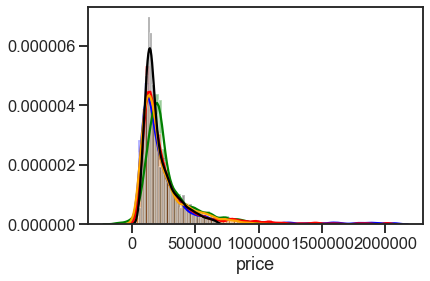

In [118]:
print("Blue = Testing Set")
print("Green = Linear Regression")
print("Red = KNN Regression")
print("Orange = Support Vector Regression - Linear")
print("Black = Support Vector Regression - RBF")
sns.distplot(ytest, color="b")
sns.distplot(ypred, color="g")
sns.distplot(ypred2, color="r")
sns.distplot(ypred3, color="orange")
sns.distplot(ypred4, color="black")
plt.show()

# TRAIN

In [116]:
print("LINEAR REGRESSION:")
print("Root Mean Squared Error is ",RMSE_lrt)
print("Mean Squared Error is ",MSE_lrt)
print("Mean Average Error is ",MAE_lrt)
print()
print("KNN REGRESSION:")
print("Root Mean Squared Error is ",RMSE_knnt)
print("Mean Squared Error is ",MSE_knnt)
print("Mean Average Error is ",MAE_knnt)
print()
print("SVR LINEAR:")
print("Root Mean Squared Error is ",RMSE_svrlint)
print("Mean Squared Error is ",MSE_svrlint)
print("Mean Average Error is ",MAE_svrlint)
print()
print("SVR RBF:")
print("Root Mean Squared Error is ",RMSE_svrrbft)
print("Mean Squared Error is ",MSE_svrrbft)
print("Mean Average Error is ",MAE_svrrbft)

LINEAR REGRESSION:
Root Mean Squared Error is  232291.27710111748
Mean Squared Error is  53959237417.26814
Mean Average Error is  110126.01792754038

KNN REGRESSION:
Root Mean Squared Error is  67077.73879225393
Mean Squared Error is  4499423041.481849
Mean Average Error is  10077.80461088315

SVR LINEAR:
Root Mean Squared Error is  246773.16306504374
Mean Squared Error is  60896994009.12667
Mean Average Error is  88574.09512855308

SVR RBF:
Root Mean Squared Error is  261601.05884006535
Mean Squared Error is  68435113986.24333
Mean Average Error is  95487.0961110843


Blue = Training Set
Green = Linear Regression
Red = KNN Regression
Orange = Support Vector Regression - Linear
Black = Support Vector Regression - RBF


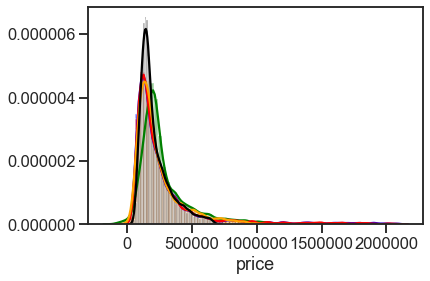

In [114]:
print("Blue = Training Set")
print("Green = Linear Regression")
print("Red = KNN Regression")
print("Orange = Support Vector Regression - Linear")
print("Black = Support Vector Regression - RBF")
sns.distplot(ytrain, color="b")
sns.distplot(ypredtrain, color="g")
sns.distplot(ypredtrain2, color="r")
sns.distplot(ypredtrain3, color="orange")
sns.distplot(ypredtrain4, color="black")
plt.show()